# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
import sys
!{sys.executable} -m pip install gensim

  Using cached https://files.pythonhosted.org/packages/ef/65/c90886ac34d4b12d3ae0bcc7aece1af57e1f30e7138aabbb3e3c027e705a/gensim-3.8.0-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/7a/0e/3781e028d62a8422244582abd8f084e6314297026760587c85607f687bf3/scipy-1.3.1-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/73/fb/00a976f728d0d1fecfe898238ce23f502a721c0ac0ecfedb80e0d88c64e9/six-1.12.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/69/25/eef8d362bd216b11e7d005331a3cca3d19b0aa57569bde680070109b745c/numpy-1.17.0-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/23/10/c0b78c27298029e4454a472a1919bde20cb182dab1662cec7f2ca1dcc523/boto-2.49.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ff/3e/2262936ad70fd6e7b8827d79d6508ce33e2ffb49bfca6fedc5fe4abd6f1c/boto3-1.9.215-py2.py3-none-any.whl
  Using cached https://files.py

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [3]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [6]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [7]:
project_grade_category = []

for i in range(len(project_data)):
    a = project_data["project_grade_category"][i].replace(" ", "_")
    project_grade_category.append(a)
    
project_data.drop(['project_grade_category'], axis=1, inplace=True)
project_data["project_grade_category"] = project_grade_category
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   
51140       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.   
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date project_subject_categories  \
55660           CA 2016-04-27 00:27:36             Math & Science   
76127           UT 2016-04-27 00:31:25              Special Needs   
51140           CA 2016-04-27 00:46:53        Literacy & Language   
473             GA 2016-04-27 00:53:00           Applied Learning   
41558           WA 2016-04-27 01:05:25        Literacy & Language   

                 project_subject_subcategories  \
55660  Applied Sciences, Health & Life Science   
76127                            Special Needs   
51140                                 Literacy   
473                          Early Development   
41558                                 Literacy   

                                        project_title  \
55660    Engineering STEAM into the Primary Classroom   
76127                         Sensory Tools for Focus   
51140  Mobile Learning with a Mobile Listening Center   
473            Flexible Seating for Flexible Learning   
41558          Going Deep: The Art of Inner Thinking!   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   
51140  Having a class of 24 students comes with diver...   
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   
51140  I have a class of twenty-four kindergarten stu...   
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   
51140  By having a mobile listening and storage cente...   
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   
51140  A mobile listening center will help keep equip...   
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   
51140  My students need a mobile listening center to ...   
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   
51140                                            10                    1   
473                                               2                    1   
41558                                             2                    1   

      project_grade_category  
55660          Grades_PreK-2  
76127             Grades_6-8  
51140             Grades_6-8  
473            Grades_PreK-2  
41558          Grades_PreK-2

## 1.2 preprocessing of `project_subject_categories`

In [8]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [9]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## Clean Titles (Text preprocessing)

In [10]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [11]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
clean_titles = []

for titles in tqdm(project_data["project_title"]):
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(f for f in title.split() if f not in stopwords)
    clean_titles.append(title.lower().strip())

100%|██████████| 109248/109248 [00:03<00:00, 34499.61it/s]


In [13]:
project_data["clean_titles"] = clean_titles

In [14]:
project_data.drop(['project_title'], axis=1, inplace=True)

## Feature "Number of Words in Title"

In [15]:
title_word_count = []
for a in project_data["clean_titles"] :
    b = len(a.split())
    title_word_count.append(b)
    
project_data["title_word_count"] = title_word_count
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   
51140       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.   
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date  \
55660           CA 2016-04-27 00:27:36   
76127           UT 2016-04-27 00:31:25   
51140           CA 2016-04-27 00:46:53   
473             GA 2016-04-27 00:53:00   
41558           WA 2016-04-27 01:05:25   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   
51140  Having a class of 24 students comes with diver...   
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   
51140  I have a class of twenty-four kindergarten stu...   
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   
51140  By having a mobile listening and storage cente...   
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   
51140  A mobile listening center will help keep equip...   
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   
51140  My students need a mobile listening center to ...   
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   
51140                                            10                    1   
473                                               2                    1   
41558                                             2                    1   

      project_grade_category   clean_categories  \
55660          Grades_PreK-2       Math_Science   
76127             Grades_6-8       SpecialNeeds   
51140             Grades_6-8  Literacy_Language   
473            Grades_PreK-2    AppliedLearning   
41558          Grades_PreK-2  Literacy_Language   

                      clean_subcategories  \
55660  AppliedSciences Health_LifeScience   
76127                        SpecialNeeds   
51140                            Literacy   
473                      EarlyDevelopment   
41558                            Literacy   

                                  clean_titles  title_word_count  
55660      engineering steam primary classroom                 4  
76127                      sensory tools focus                 3  
51140  mobile learning mobile listening center                 5  
473         flexible seating flexible learning                 4  
41558        going deep the art inner thinking                 6

## 1.3 Text preprocessing

In [16]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [17]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date  \
55660           CA 2016-04-27 00:27:36   
76127           UT 2016-04-27 00:31:25   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   

      project_grade_category clean_categories  \
55660          Grades_PreK-2     Math_Science   
76127             Grades_6-8     SpecialNeeds   

                      clean_subcategories  \
55660  AppliedSciences Health_LifeScience   
76127                        SpecialNeeds   

                              clean_titles  title_word_count  \
55660  engineering steam primary classroom                 4   
76127                  sensory tools focus                 3   

                                                   essay  
55660  I have been fortunate enough to use the Fairy ...  
76127  Imagine being 8-9 years old. You're in your th...

## Clean Essays (Text preprocessing)

In [18]:
clean_essay = []

for ess in tqdm(project_data["essay"]):
    ess = decontracted(ess)
    ess = ess.replace('\\r', ' ')
    ess = ess.replace('\\"', ' ')
    ess = ess.replace('\\n', ' ')
    ess = re.sub('[^A-Za-z0-9]+', ' ', ess)
    ess = ' '.join(f for f in ess.split() if f not in stopwords)
    clean_essay.append(ess.lower().strip())

100%|██████████| 109248/109248 [01:13<00:00, 1487.44it/s]


In [19]:
project_data["clean_essays"] = clean_essay

In [20]:
project_data.drop(['essay'], axis=1, inplace=True)

## Number of Words in Essay

In [21]:
essay_word_count = []
for ess in project_data["clean_essays"] :
    c = len(ess.split())
    essay_word_count.append(c)
    
project_data["essay_word_count"] = essay_word_count
    
project_data.head(5)    

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   
51140       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.   
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date  \
55660           CA 2016-04-27 00:27:36   
76127           UT 2016-04-27 00:31:25   
51140           CA 2016-04-27 00:46:53   
473             GA 2016-04-27 00:53:00   
41558           WA 2016-04-27 01:05:25   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   
51140  Having a class of 24 students comes with diver...   
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   
51140  I have a class of twenty-four kindergarten stu...   
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   
51140  By having a mobile listening and storage cente...   
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   
51140  A mobile listening center will help keep equip...   
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   
51140  My students need a mobile listening center to ...   
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   
51140                                            10                    1   
473                                               2                    1   
41558                                             2                    1   

      project_grade_category   clean_categories  \
55660          Grades_PreK-2       Math_Science   
76127             Grades_6-8       SpecialNeeds   
51140             Grades_6-8  Literacy_Language   
473            Grades_PreK-2    AppliedLearning   
41558          Grades_PreK-2  Literacy_Language   

                      clean_subcategories  \
55660  AppliedSciences Health_LifeScience   
76127                        SpecialNeeds   
51140                            Literacy   
473                      EarlyDevelopment   
41558                            Literacy   

                                  clean_titles  title_word_count  \
55660      engineering steam primary classroom                 4   
76127                      sensory tools focus                 3   
51140  mobile learning mobile listening center                 5   
473         flexible seating flexible learning                 4   
41558        going deep the art inner thinking                 6   

                              

## Train test Split

In [22]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(project_data, project_data['project_is_approved'], test_size=0.33, stratify = project_data['project_is_approved'])
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [23]:
# printing some random reviews
print(project_data['clean_essays'].values[0])
print("="*50)
print(project_data['clean_essays'].values[150])
print("="*50)
print(project_data['clean_essays'].values[1000])
print("="*50)
print(project_data['clean_essays'].values[20000])
print("="*50)
print(project_data['clean_essays'].values[99999])
print("="*50)

i fortunate enough use fairy tale stem kits classroom well stem journals students really enjoyed i would love implement lakeshore stem kits classroom next school year provide excellent engaging stem lessons my students come variety backgrounds including language socioeconomic status many not lot experience science engineering kits give materials provide exciting opportunities students each month i try several science stem steam projects i would use kits robot help guide science instruction engaging meaningful ways i adapt kits current language arts pacing guide already teach material kits like tall tales paul bunyan johnny appleseed the following units taught next school year i implement kits magnets motion sink vs float robots i often get units not know if i teaching right way using right materials the kits give additional ideas strategies lessons prepare students science it challenging develop high quality science activities these kits give materials i need provide students science a

In [24]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [25]:
sent = decontracted(project_data['clean_essays'].values[20000])
print(sent)
print("="*50)

a person person no matter small dr seuss i teach smallest students biggest enthusiasm learning my students learn many different ways using senses multiple intelligences i use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans our school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered having social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition my students love role play pretend kitchen early childhood classroom i several kids ask can try cooking real food i take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time my students grounded appreciation work went making food knowledge ingred

In [26]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

a person person no matter small dr seuss i teach smallest students biggest enthusiasm learning my students learn many different ways using senses multiple intelligences i use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans our school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered having social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition my students love role play pretend kitchen early childhood classroom i several kids ask can try cooking real food i take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time my students grounded appreciation work went making food knowledge ingred

In [27]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

a person person no matter small dr seuss i teach smallest students biggest enthusiasm learning my students learn many different ways using senses multiple intelligences i use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans our school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered having social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition my students love role play pretend kitchen early childhood classroom i several kids ask can try cooking real food i take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time my students grounded appreciation work went making food knowledge ingred

In [28]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

## Preprocessed Train data (Essay)

In [29]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['clean_essays'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_train.append(sent.lower().strip())

100%|██████████| 49041/49041 [00:23<00:00, 2055.75it/s]


In [30]:
# after preprocesing
preprocessed_essays_train[20000]

'students range academic levels honors students 95th percentile struggling students 1st percentile teach 50 boys 25 girls conduct learning style inventory students beginning year find learn best identify individual learning style seat groups varied learning styles setting good examples others good role model student expectation classroom school focuses giving students leadership roles classroom within school leadership roles given qualified student not outstanding student everyone job completing work accurately behavior warrants position course let struggling student feel accomplished give job know part classroom community much kid makes often times incentive getting classroom job brings best performance everyone school wide literacy goal every child read one million words april 2017 kids easy goal reach simply matter get one month two kids may well told needed swim across atlantic inconceivable somewhere along way either never pushed read given exposure reading material perhaps never 

## Preprocessed Test data (Essay)

In [31]:
preprocessed_essays_test = []
# tqdm is for printing the status bar
for sentence in tqdm(X_test['clean_essays'].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_test.append(sent.lower().strip())

100%|██████████| 36052/36052 [00:17<00:00, 2057.81it/s]


In [32]:
preprocessed_essays_test[0]

'special needs teacher work many students grades 3 5 included general education classroom students varying disabilities work students autism learning disabilities students love learn sometimes need different approach understand concepts retain important skills taught class often need hands materials make learning engaging meaningful see tangible representations learning students work hard day day learn fundamentals reading need exposure different materials order cement understanding well fun way outlet learning using reading games reinforcing skills already learning class fun interactive way students relate not students learning playing also able practice social skills completing tasks involving turn taking problem solving times conflict resolution nannan'

## Preprocessed Cross Validation data (essay)

In [33]:
preprocessed_essays_cv = []
# tqdm is for printing the status bar
for sentence in tqdm(X_cv['clean_essays'].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_cv.append(sent.lower().strip())

100%|██████████| 24155/24155 [00:11<00:00, 2050.99it/s]


In [34]:
preprocessed_essays_cv[0]

'quote try live change wish see world try relay message kiddos constantly practicing growth mindset struggles persevere students student heart every morning read school contract reminder follow code conduct work together heterogeneous partnerships groups day focus bunch time collaborative conversations academic area keeping task building language positive take active stance learning class finds calming art time hope try integrate curriculum paintbrushes water colors would also like class use art projects gifts take home learn basics shading water colors also growing artists items improve classroom give students may not feel successful academic area feel understand area geometry fractions painting build equity students representing math social studies science vehicle visual arts students able express art'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

## Preprocessing of Project Title for Train data

In [35]:
# similarly you can preprocess the titles also
preprocessed_titles_train = []

for titles in tqdm(X_train["clean_titles"]):
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(f for f in title.split() if f not in stopwords)
    preprocessed_titles_train.append(title.lower().strip())

100%|██████████| 49041/49041 [00:01<00:00, 35957.45it/s]


In [36]:
preprocessed_titles_train[0]

'no place like chrome'

## Preprocessing of Project Title for Test data

In [37]:
preprocessed_titles_test = []

for titles in tqdm(X_test["clean_titles"]):
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(f for f in title.split() if f not in stopwords)
    preprocessed_titles_test.append(title.lower().strip())

100%|██████████| 36052/36052 [00:01<00:00, 35537.63it/s]


In [38]:
preprocessed_titles_test[0]

'fun games reading'

## Preprocessing of Project Title for CV data

In [39]:
preprocessed_titles_cv = []

for titles in tqdm(X_cv["clean_titles"]):
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(f for f in title.split() if f not in stopwords)
    preprocessed_titles_cv.append(title.lower().strip())

100%|██████████| 24155/24155 [00:00<00:00, 35233.97it/s]


In [40]:
preprocessed_titles_cv[0]

'visual art integration 04 28 16'

## 1.5 Preparing data for models

In [41]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'project_grade_category', 'clean_categories', 'clean_subcategories',
       'clean_titles', 'title_word_count', 'clean_essays', 'essay_word_count'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [42]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_proj = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_proj.fit(X_train['clean_categories'].values)

categories_one_hot_train = vectorizer_proj.transform(X_train['clean_categories'].values)
categories_one_hot_test = vectorizer_proj.transform(X_test['clean_categories'].values)
categories_one_hot_cv = vectorizer_proj.transform(X_cv['clean_categories'].values)

print(vectorizer_proj.get_feature_names())


print("Shape of matrix of Train data after one hot encoding ",categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",categories_one_hot_test.shape)
print("Shape of matrix of CV data after one hot encoding ",categories_one_hot_cv.shape)

['Care_Hunger', 'Math_Science', 'History_Civics', 'Music_Arts', 'Warmth', 'SpecialNeeds', 'AppliedLearning', 'Literacy_Language', 'Health_Sports']
Shape of matrix of Train data after one hot encoding  (49041, 9)
Shape of matrix of Test data after one hot encoding  (36052, 9)
Shape of matrix of CV data after one hot encoding  (24155, 9)


In [43]:
# we use count vectorizer to convert the values into one 
vectorizer_sub_proj = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_sub_proj.fit(X_train['clean_subcategories'].values)

sub_categories_one_hot_train = vectorizer_sub_proj.transform(X_train['clean_subcategories'].values)
sub_categories_one_hot_test = vectorizer_sub_proj.transform(X_test['clean_subcategories'].values)
sub_categories_one_hot_cv = vectorizer_sub_proj.transform(X_cv['clean_subcategories'].values)


print(vectorizer_sub_proj.get_feature_names())



print("Shape of matrix of Train data after one hot encoding ",sub_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",sub_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",sub_categories_one_hot_cv.shape)

['Mathematics', 'SocialSciences', 'Gym_Fitness', 'FinancialLiteracy', 'EnvironmentalScience', 'CommunityService', 'VisualArts', 'Warmth', 'History_Geography', 'NutritionEducation', 'Health_Wellness', 'Extracurricular', 'Literature_Writing', 'PerformingArts', 'ForeignLanguages', 'AppliedSciences', 'EarlyDevelopment', 'Health_LifeScience', 'College_CareerPrep', 'Music', 'Civics_Government', 'TeamSports', 'Economics', 'Literacy', 'Care_Hunger', 'ESL', 'Other', 'SpecialNeeds', 'CharacterEducation', 'ParentInvolvement']
Shape of matrix of Train data after one hot encoding  (49041, 30)
Shape of matrix of Test data after one hot encoding  (36052, 30)
Shape of matrix of Cross Validation data after one hot encoding  (24155, 30)


In [44]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also
my_counter = Counter()
for state in project_data['school_state'].values:
    my_counter.update(state.split())
    

In [45]:
school_state_cat_dict = dict(my_counter)
sorted_school_state_cat_dict = dict(sorted(school_state_cat_dict.items(), key=lambda kv: kv[1]))


In [46]:
## we use count vectorizer to convert the values into one hot encoded features

vectorizer_states = CountVectorizer(vocabulary=list(sorted_school_state_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_states.fit(X_train['school_state'].values)

school_state_categories_one_hot_train = vectorizer_states.transform(X_train['school_state'].values)
school_state_categories_one_hot_test = vectorizer_states.transform(X_test['school_state'].values)
school_state_categories_one_hot_cv = vectorizer_states.transform(X_cv['school_state'].values)

print(vectorizer_states.get_feature_names())



print("Shape of matrix of Train data after one hot encoding ",school_state_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",school_state_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",school_state_categories_one_hot_cv.shape)

['ID', 'NY', 'WA', 'RI', 'NM', 'MI', 'HI', 'IA', 'AR', 'NH', 'WY', 'NE', 'NC', 'KY', 'UT', 'OK', 'IN', 'CO', 'AZ', 'FL', 'WV', 'SD', 'GA', 'WI', 'CA', 'SC', 'KS', 'DC', 'MO', 'DE', 'VT', 'MS', 'AL', 'NV', 'ME', 'OR', 'TX', 'MA', 'CT', 'NJ', 'MT', 'MD', 'MN', 'TN', 'OH', 'PA', 'IL', 'VA', 'ND', 'LA', 'AK']
Shape of matrix of Train data after one hot encoding  (49041, 51)
Shape of matrix of Test data after one hot encoding  (36052, 51)
Shape of matrix of Cross Validation data after one hot encoding  (24155, 51)


In [47]:
my_counter = Counter()
for project_grade in project_data['project_grade_category'].values:
    my_counter.update(project_grade.split())

In [48]:
project_grade_cat_dict = dict(my_counter)
sorted_project_grade_cat_dict = dict(sorted(project_grade_cat_dict.items(), key=lambda kv: kv[1]))

In [49]:
## we use count vectorizer to convert the values into one hot encoded features

vectorizer_grade = CountVectorizer(vocabulary=list(sorted_project_grade_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_grade.fit(X_train['project_grade_category'].values)

project_grade_categories_one_hot_train = vectorizer_grade.transform(X_train['project_grade_category'].values)
project_grade_categories_one_hot_test = vectorizer_grade.transform(X_test['project_grade_category'].values)
project_grade_categories_one_hot_cv = vectorizer_grade.transform(X_cv['project_grade_category'].values)

print(vectorizer_grade.get_feature_names())



print("Shape of matrix of Train data after one hot encoding ",project_grade_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",project_grade_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",project_grade_categories_one_hot_cv.shape)

['Grades_PreK-2', 'Grades_6-8', 'Grades_9-12', 'Grades_3-5']
Shape of matrix of Train data after one hot encoding  (49041, 4)
Shape of matrix of Test data after one hot encoding  (36052, 4)
Shape of matrix of Cross Validation data after one hot encoding  (24155, 4)


In [50]:
my_counter = Counter()
for teacher_prefix in project_data['teacher_prefix'].values:
    teacher_prefix = str(teacher_prefix)
    my_counter.update(teacher_prefix.split())

In [51]:
teacher_prefix_cat_dict = dict(my_counter)
sorted_teacher_prefix_cat_dict = dict(sorted(teacher_prefix_cat_dict.items(), key=lambda kv: kv[1]))

In [52]:
## we use count vectorizer to convert the values into one hot encoded features
## Unlike the previous Categories this category returns a
## ValueError: np.nan is an invalid document, expected byte or unicode string.
## The link below explains h0w to tackle such discrepancies.
## https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document/39308809#39308809

vectorizer_teacher = CountVectorizer(vocabulary=list(sorted_teacher_prefix_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_teacher.fit(X_train['teacher_prefix'].values.astype("U"))

teacher_prefix_categories_one_hot_train = vectorizer_teacher.transform(X_train['teacher_prefix'].values.astype("U"))
teacher_prefix_categories_one_hot_test = vectorizer_teacher.transform(X_test['teacher_prefix'].values.astype("U"))
teacher_prefix_categories_one_hot_cv = vectorizer_teacher.transform(X_cv['teacher_prefix'].values.astype("U"))

print(vectorizer_teacher.get_feature_names())


print("Shape of matrix after one hot encoding ",teacher_prefix_categories_one_hot_train.shape)
print("Shape of matrix after one hot encoding ",teacher_prefix_categories_one_hot_test.shape)
print("Shape of matrix after one hot encoding ",teacher_prefix_categories_one_hot_cv.shape)

['nan', 'Dr.', 'Teacher', 'Ms.', 'Mrs.', 'Mr.']
Shape of matrix after one hot encoding  (49041, 6)
Shape of matrix after one hot encoding  (36052, 6)
Shape of matrix after one hot encoding  (24155, 6)


### 1.5.2 Vectorizing Text data

## a) Bag of words Train Data (Essays)

In [53]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_bow_essay = CountVectorizer(min_df=10)

vectorizer_bow_essay.fit(preprocessed_essays_train)

text_bow_train = vectorizer_bow_essay.transform(preprocessed_essays_train)



print("Shape of matrix after one hot encoding ",text_bow_train.shape)

Shape of matrix after one hot encoding  (49041, 12054)


## b) Bag of words Test Data (Essays)

In [54]:
text_bow_test = vectorizer_bow_essay.transform(preprocessed_essays_test)
print("Shape of matrix after one hot encoding ",text_bow_test.shape)

Shape of matrix after one hot encoding  (36052, 12054)


## c) Bag of words CV Data (Essays)

In [55]:
text_bow_cv = vectorizer_bow_essay.transform(preprocessed_essays_cv)
print("Shape of matrix after one hot encoding ",text_bow_cv.shape)

Shape of matrix after one hot encoding  (24155, 12054)


## d) Bag of words train Data (Titles)

In [56]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
vectorizer_bow_title = CountVectorizer(min_df=10)



vectorizer_bow_title.fit(preprocessed_titles_train)



title_bow_train = vectorizer_bow_title.transform(preprocessed_titles_train)



print("Shape of matrix after one hot encoding ",title_bow_train.shape)

Shape of matrix after one hot encoding  (49041, 1968)


## e) Bag of words Test Data (Titles)

In [57]:
title_bow_test = vectorizer_bow_title.transform(preprocessed_titles_test)
print("Shape of matrix after one hot encoding ",title_bow_test.shape)

Shape of matrix after one hot encoding  (36052, 1968)


## f) Bag of words  Data (Titles)

In [58]:
title_bow_cv = vectorizer_bow_title.transform(preprocessed_titles_cv)
print("Shape of matrix after one hot encoding ",title_bow_cv.shape)

Shape of matrix after one hot encoding  (24155, 1968)


#### 1.5.2.2 TFIDF vectorizer

## a) TFIDF vectorizer Train Data (Essays)

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf_essay = TfidfVectorizer(min_df=10)
vectorizer_tfidf_essay.fit(preprocessed_essays_train)

text_tfidf_train = vectorizer_tfidf_essay.transform(preprocessed_essays_train)



print("Shape of matrix after one hot encoding ",text_tfidf_train.shape)

Shape of matrix after one hot encoding  (49041, 12054)


## b) TFIDF vectorizer Test Data (Essays)

In [60]:
text_tfidf_test = vectorizer_tfidf_essay.transform(preprocessed_essays_test)
print("Shape of matrix after one hot encoding ",text_tfidf_test.shape)

Shape of matrix after one hot encoding  (36052, 12054)


## c) TFIDF vectorizer CV Data (Essays)

In [61]:
text_tfidf_cv = vectorizer_tfidf_essay.transform(preprocessed_essays_cv)
print("Shape of matrix after one hot encoding ",text_tfidf_cv.shape)

Shape of matrix after one hot encoding  (24155, 12054)


## c) TFIDF vectorizer Train Data (Titles)

In [62]:
vectorizer_tfidf_titles = TfidfVectorizer(ngram_range=(2,2), min_df=10)

vectorizer_tfidf_titles.fit(preprocessed_titles_train)
title_tfidf_train = vectorizer_tfidf_titles.transform(preprocessed_titles_train)



print("Shape of matrix after one hot encoding ",title_tfidf_train.shape)

Shape of matrix after one hot encoding  (49041, 1241)


## d) TFIDF vectorizer Test Data (Titles)

In [63]:
title_tfidf_test = vectorizer_tfidf_titles.transform(preprocessed_titles_test)
print("Shape of matrix after one hot encoding ",title_tfidf_test.shape)

Shape of matrix after one hot encoding  (36052, 1241)


## e) TFIDF vectorizer CV Data (Titles)

In [64]:
title_tfidf_cv = vectorizer_tfidf_titles.transform(preprocessed_titles_cv)
print("Shape of matrix after one hot encoding ",title_tfidf_cv.shape)

Shape of matrix after one hot encoding  (24155, 1241)


# C) Using Pretrained Models : AVG W2V

In [65]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model

model = loadGloveModel('glove.42B.300d.txt')


words = []
for i in preprocessed_essays_train :
    words.extend(i.split(' '))

print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)

Loading Glove Model


FileNotFoundError: [Errno 2] No such file or directory: 'glove.42B.300d.txt'

In [66]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

## Train Essay

In [67]:
# average Word2Vec
# compute average word2vec for each review.

avg_w2v_vectors_train = []; 

for sentence in tqdm(X_train["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))

100%|██████████| 49041/49041 [00:16<00:00, 2900.81it/s]

49041
300


## Test Essay

In [68]:
# average Word2Vec
# compute average word2vec for each review.

avg_w2v_vectors_test = []; 

for sentence in tqdm(X_test["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|██████████| 36052/36052 [00:12<00:00, 2920.22it/s]

36052
300


## Cross validation Essay

In [69]:
avg_w2v_vectors_cv = []; 

for sentence in tqdm(X_cv["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

print(len(avg_w2v_vectors_cv))
print(len(avg_w2v_vectors_cv[0]))

100%|██████████| 24155/24155 [00:08<00:00, 2891.66it/s]

24155
300


## train Titles

In [70]:
avg_w2v_vectors_titles_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["clean_titles"]): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_train.append(vector)

print(len(avg_w2v_vectors_titles_train))
print(len(avg_w2v_vectors_titles_train[0]))

100%|██████████| 49041/49041 [00:00<00:00, 58925.56it/s]

49041
300


## Test Titles

In [71]:
avg_w2v_vectors_titles_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["clean_titles"]): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_test.append(vector)

print(len(avg_w2v_vectors_titles_test))
print(len(avg_w2v_vectors_titles_test[0]))

100%|██████████| 36052/36052 [00:00<00:00, 57293.30it/s]

36052
300


## CV Titles

In [72]:
avg_w2v_vectors_titles_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv["clean_titles"]): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_cv.append(vector)

print(len(avg_w2v_vectors_titles_cv))
print(len(avg_w2v_vectors_titles_cv[0]))

100%|██████████| 24155/24155 [00:00<00:00, 57484.91it/s]

24155
300


## D) Using Pretrained Models: TFIDF weighted W2V


## Train - Essays

In [73]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train["clean_essays"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [74]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

100%|██████████| 49041/49041 [01:50<00:00, 445.75it/s]

49041
300


## Test essays

In [75]:
# compute average word2vec for each review.

tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

100%|██████████| 36052/36052 [01:19<00:00, 455.48it/s]

36052
300


## CV essays

In [76]:
# compute average word2vec for each review.

tfidf_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)

print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))

100%|██████████| 24155/24155 [00:54<00:00, 447.06it/s]

24155
300


## Train Titles

In [77]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train["clean_titles"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [78]:
# compute average word2vec for each review.

tfidf_w2v_vectors_titles_train = []; 

for sentence in tqdm(X_train["clean_titles"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_train.append(vector)

print(len(tfidf_w2v_vectors_titles_train))
print(len(tfidf_w2v_vectors_titles_train[0]))

100%|██████████| 49041/49041 [00:01<00:00, 27796.09it/s]

49041
300


## Test Titles

In [79]:
# compute average word2vec for each review.

tfidf_w2v_vectors_titles_test = []; 

for sentence in tqdm(X_test["clean_titles"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_test.append(vector)

print(len(tfidf_w2v_vectors_titles_test))
print(len(tfidf_w2v_vectors_titles_test[0]))

100%|██████████| 36052/36052 [00:01<00:00, 24941.13it/s]

36052
300


## CV Titles

In [80]:
# compute average word2vec for each review.

tfidf_w2v_vectors_titles_cv = []; 

for sentence in tqdm(X_cv["clean_titles"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_cv.append(vector)

print(len(tfidf_w2v_vectors_titles_cv))
print(len(tfidf_w2v_vectors_titles_cv[0]))

100%|██████████| 24155/24155 [00:00<00:00, 26973.01it/s]

24155
300


### 1.5.3 Vectorizing Numerical features

## a) Price

In [81]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [82]:
# join two dataframes in python: 
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')
X_cv = pd.merge(X_cv, price_data, on='id', how='left')

In [83]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikitlearn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
price_scalar = MinMaxScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standarddeviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
price_train = price_scalar.transform(X_train['price'].values.reshape(-1, 1))
price_train 
# Now standardize the data with above maen and variance.
price_test = price_scalar.transform(X_test['price'].values.reshape(-1, 1))
price_test 
# Now standardize the data with above maen and variance.
price_cv = price_scalar.transform(X_cv['price'].values.reshape(-1, 1))
price_cv 


array([[0.00684016],
       [0.03753334],
       [0.00442175],
       ...,
       [0.01682884],
       [0.0035406 ],
       [0.02043045]])

In [84]:
print("After vectorizations")
print(price_train.shape, y_train.shape)
print(price_cv.shape, y_cv.shape)
print(price_test.shape, y_test.shape)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


## b) Quantity

In [85]:
price_scalar.fit(X_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
quantity_train = price_scalar.transform(X_train['quantity'].values.reshape(-1, 1))
quantity_train
# Now standardize the data with above maen and variance.
quantity_cv = price_scalar.transform(X_cv['quantity'].values.reshape(-1, 1))
quantity_cv
# Now standardize the data with above maen and variance.
quantity_test = price_scalar.transform(X_test['quantity'].values.reshape(-1, 1))
quantity_test


array([[0.00616333],
       [0.03389831],
       [0.        ],
       ...,
       [0.00924499],
       [0.01232666],
       [0.01078582]])

In [86]:
print("After vectorizations")
print(quantity_train.reshape, y_train.shape)
print(quantity_cv.shape, y_cv.shape)
print(quantity_test.shape, y_test.shape)

After vectorizations
<built-in method reshape of numpy.ndarray object at 0x7f5e14d770d0> (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


## c) Number of Projects previously proposed by Teacher

In [87]:
price_scalar.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
prev_projects_train = price_scalar.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
prev_projects_train
# Now standardize the data with above maen and variance.
prev_projects_cv = price_scalar.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
prev_projects_cv
# Now standardize the data with above maen and variance.
prev_projects_test = price_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
prev_projects_test


array([[0.00221729],
       [0.        ],
       [0.11529933],
       ...,
       [0.09756098],
       [0.00665188],
       [0.00221729]])

In [88]:
print("After vectorizations")
print(prev_projects_train.shape, y_train.shape)
print(prev_projects_cv.shape, y_cv.shape)
print(prev_projects_test.shape, y_test.shape)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


# Assignment 7: Decision Trees

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [4,6, 8, 9,10,12,14,17] , and the best `min_samples_split` in range [2,10,20,30,40,50])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>min_sample_split</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h2>2.1 Set 1: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</h2>

In [89]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train,school_state_categories_one_hot_train, project_grade_categories_one_hot_train,teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_bow_train, text_bow_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test,school_state_categories_one_hot_test, project_grade_categories_one_hot_test,teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_bow_test, text_bow_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv,school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv,teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv,title_bow_cv, text_bow_cv)).tocsr()


In [90]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 14125) (49041,)
(24155, 14125) (24155,)
(36052, 14125) (36052,)


In [91]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

## A) Gridsearch-cv

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [93]:
dt1 = DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 20, 45, 75, 100, 135, 270, 500]}

clf1 = GridSearchCV(dt1, parameters, cv= 2, scoring='roc_auc',n_jobs=-1,return_train_score=True)
clf1.fit(X_tr, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 1000],
                         'min_samples_split': [5, 10, 20, 45, 

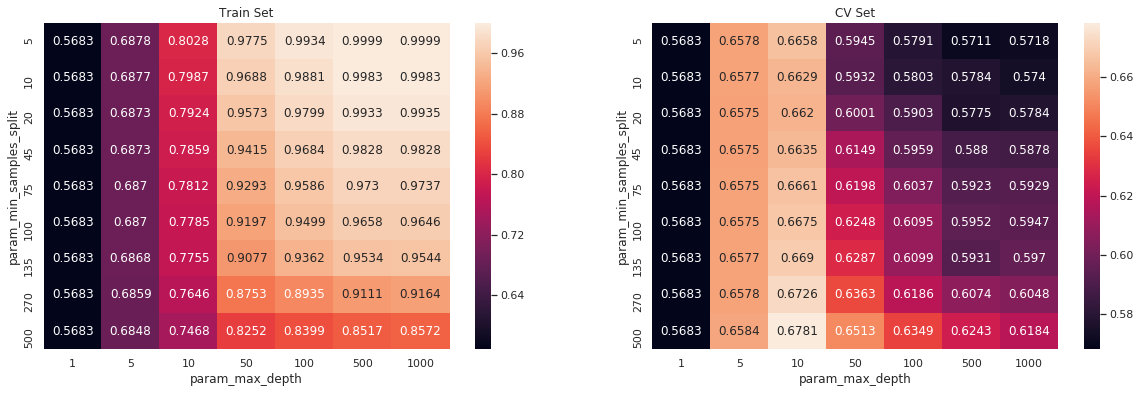

In [94]:
import seaborn as sns; sns.set()


max_scores1 = pd.DataFrame(clf1.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

## B) Train model using the best hyper-parameter value

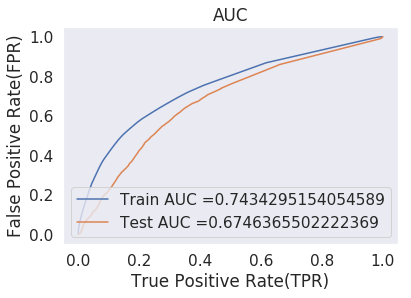

In [107]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500,class_weight = 'balanced')
model.fit(X_tr, y_train)
clfV1=DecisionTreeClassifier (class_weight = 'balanced',max_depth=3,min_samples_split=500)
# for visulation
clfV1.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positiveclass
# not the predicted outputs
y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

## D) Confusion Matrix

In [108]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    global predictions1# make it global
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1= predictions       
    return predictions

## Train Data

In [109]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2475040382279047 for threshold 0.36
[[ 4084  3342]
 [ 9334 32281]]


In [110]:
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.2475040382279047 for threshold 0.36


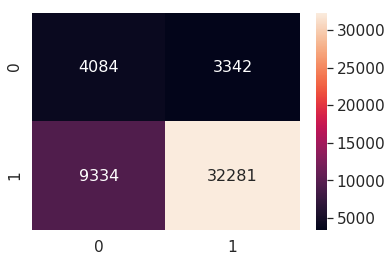

In [111]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

## Test Data

In [112]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999294479210055 for threshold 0.36
[[ 2715  2744]
 [ 7295 23298]]


In [113]:
conf_matr_df_test_2 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999294479210055 for threshold 0.36


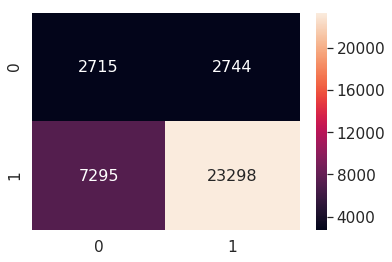

In [114]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_2, annot=True,annot_kws={"size": 16}, fmt='g')

## Feature aggregation

In [123]:
f1=vectorizer_proj.get_feature_names()
f2=vectorizer_sub_proj.get_feature_names()
f3= vectorizer_states.get_feature_names()
f4= vectorizer_grade.get_feature_names()
f5 = vectorizer_teacher.get_feature_names()
fbow= vectorizer_bow_essay.get_feature_names()
ftbow = vectorizer_bow_title.get_feature_names()
ftfidf = vectorizer_tfidf_essay.get_feature_names()
fttfidft = vectorizer_tfidf_titles.get_feature_names()

feature_agg_bow = f1 + f2 + f3 + f4 + f5 + fbow + ftbow
feature_agg_tfidf = f1 + f2 + f3 + f4 + f5 + ftfidf + fttfidft
# p is price, q is quantity, t is teacher previous year projects
feature_agg_bow.append('price')
feature_agg_tfidf.append('price')
feature_agg_bow.append('quantity')
feature_agg_tfidf.append('quantity')
feature_agg_bow.append('teacher_previous_projects')
feature_agg_tfidf.append('teacher_previous_projects')

## Visualizing Decision Tree

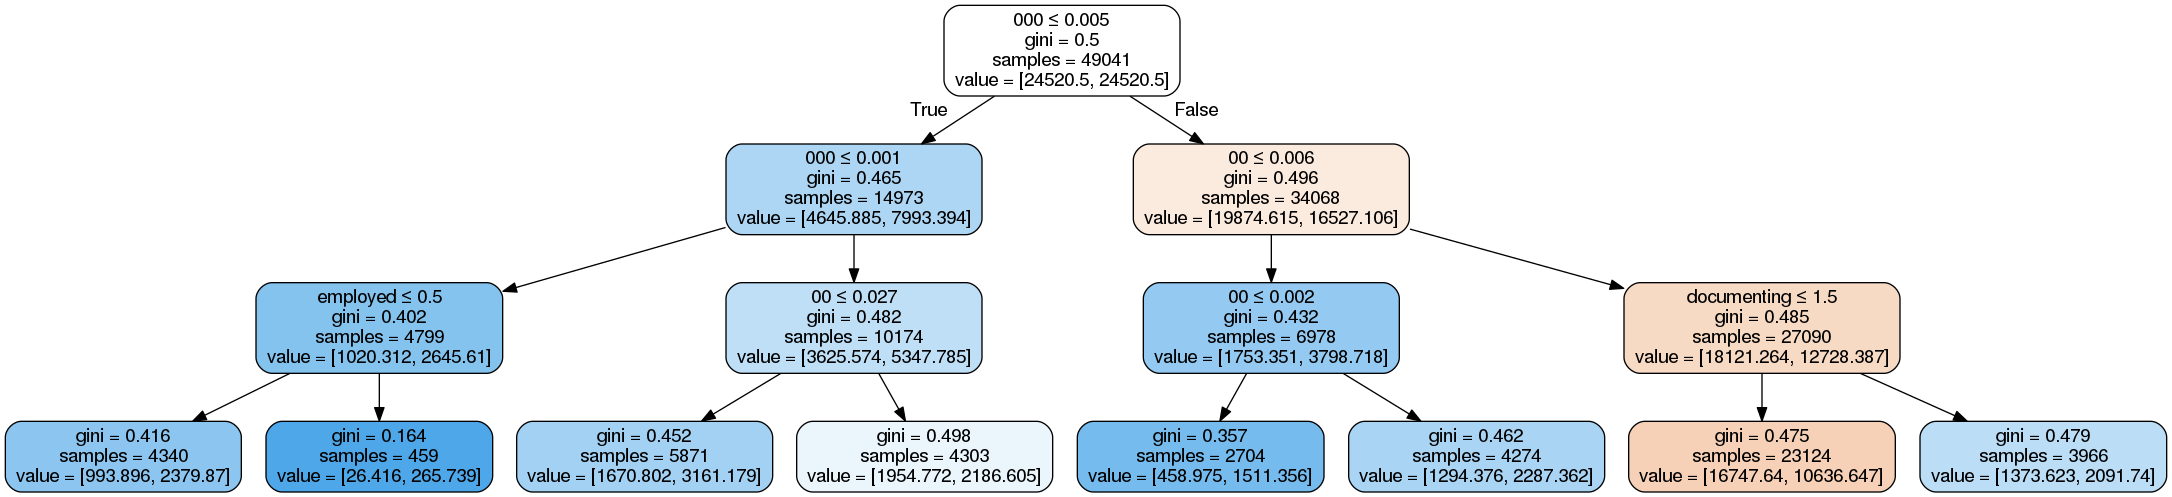

In [124]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clfV1, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=feature_agg_bow)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


## False Positives 

In [125]:
fpi = []

for i in range(len(y_test)) :
    if (y_test.values[i] == 0) & (predictions1[i] == 1) :
        fpi.append(i)
    


In [126]:
fp_essay1 = []
for i in fpi :
    fp_essay1.append(X_test['clean_essays'].values[i])


In [127]:
len(fp_essay1)

2744

## Word Cloud (False positives essay)

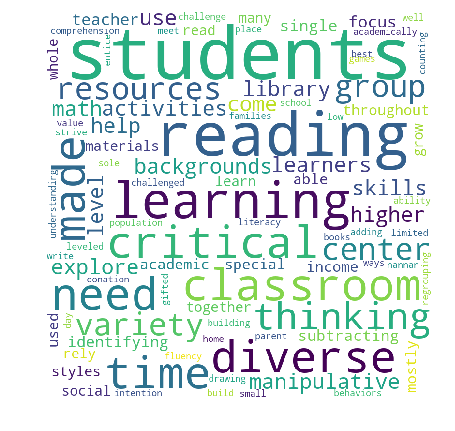

In [128]:
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 

for val in fp_essay1 :
    val = str(val)
    tokens = val.split()
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
for words in tokens :
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)
  

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

## Building DataFrame of False Positives

In [129]:
cols = X_test.columns
X_test_falsePos1 = pd.DataFrame(columns=cols)

In [130]:
for i in fpi :
    X_test_falsePos1 = X_test_falsePos1.append(X_test.filter(items=[i], axis=0))

In [131]:
len(X_test_falsePos1)

2744

In [132]:
X_test_falsePos1.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
35     136188  p166914  dd32fbe60f0d5981c9f8822db9bfb80e            Ms.   
65      77315  p007303  25cf951f507a0aaa6f251bbc02ab45a7           Mrs.   

   school_state                Date  \
35           NY 2016-10-04 13:53:20   
65           NC 2016-08-05 00:00:50   

                                      project_essay_1  \
35  I work in a small school in South Bronx, New Y...   
65  The students at Forestville Rd. Elementary are...   

                                      project_essay_2 project_essay_3  \
35  I am requesting styrofoam cups and string so t...             NaN   
65  The media center is under construction! We are...             NaN   

   project_essay_4  ... project_is_approved project_grade_category  \
35             NaN  ...                   0            Grades_9-12   
65             NaN  ...                   0             Grades_3-5   

                  clean_categories    clean_subcategories  \
35                      Music_Arts             VisualArts   
65  Literacy_Language SpecialNeeds  Literacy SpecialNeeds   

                                    clean_titles title_word_count  \
35  styrofoam cup cloud inspired by tara donovan                7   
65                            sitting creatively                2   

                                         clean_essays essay_word_count  price  \
35  i work small school south bronx new york city ...              143  54.36   
65  the students forestville rd elementary excited...              130  96.01   

   quantity  
35       11  
65        4  

[2 rows x 22 columns]

## box plot for Price

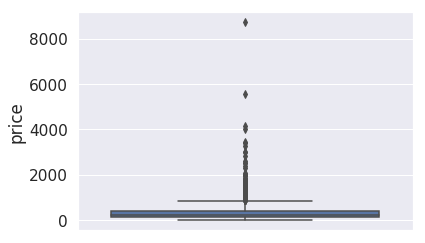

In [133]:
graph = sns.boxplot(y='price', data=X_test_falsePos1)

## PDF on teacher_number_of_previously_posted_projects

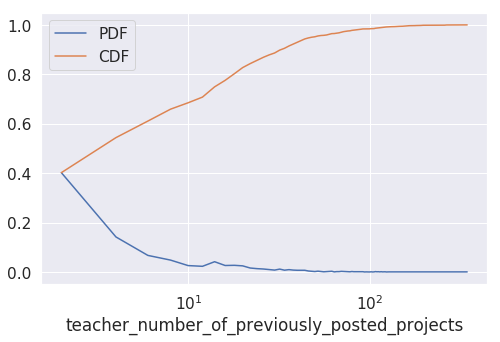

In [134]:
plt.figure(figsize=(8,5))

counts, bin_edges = np.histogram(X_test_falsePos1['teacher_number_of_previously_posted_projects'], bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"]) 
plt.xscale('log')
plt.xlabel('teacher_number_of_previously_posted_projects')    
plt.show()

## Set 2 : categorical, numerical features + project_title(TFIDF) + preprocessed_essay (TFIDF)

In [135]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr2 = hstack((categories_one_hot_train, sub_categories_one_hot_train,school_state_categories_one_hot_train, project_grade_categories_one_hot_train,teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, text_tfidf_train, title_tfidf_train)).tocsr()
X_te2 = hstack((categories_one_hot_test, sub_categories_one_hot_test,school_state_categories_one_hot_test, project_grade_categories_one_hot_test,teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, text_tfidf_test, title_tfidf_test)).tocsr()
X_cr2 = hstack((categories_one_hot_cv, sub_categories_one_hot_cv,school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv,teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv,text_tfidf_cv, title_tfidf_cv)).tocsr()


In [136]:
print("Final Data matrix")
print(X_tr2.shape, y_train.shape)
print(X_cr2.shape, y_cv.shape)
print(X_te2.shape, y_test.shape)

Final Data matrix
(49041, 13398) (49041,)
(24155, 13398) (24155,)
(36052, 13398) (36052,)


## GridSearch CV

In [137]:
dt2 = DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 20, 45, 75, 100, 135, 270, 500]}

clf2 = GridSearchCV(dt2, parameters, cv= 2, scoring='roc_auc',n_jobs=-1,return_train_score=True)
clf2.fit(X_tr2, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 1000],
                         'min_samples_split': [5, 10, 20, 45, 

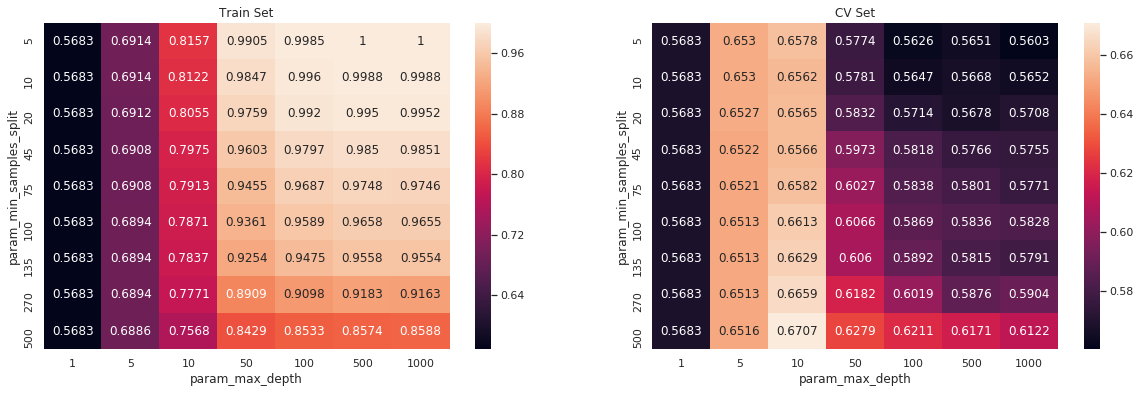

In [138]:
import seaborn as sns; sns.set()


max_scores2 = pd.DataFrame(clf2.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores2.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores2.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

## Train model using the best hyper-parameter value

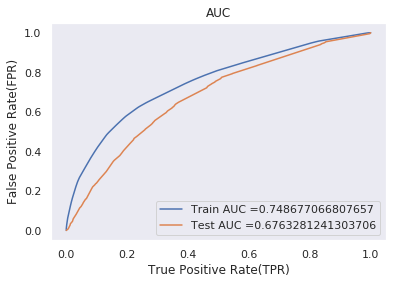

In [139]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500,class_weight = 'balanced')
model.fit(X_tr2, y_train)
clfV2=DecisionTreeClassifier (class_weight = 'balanced',max_depth=3,min_samples_split=500)
# for visulation
clfV2.fit(X_tr2, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positiveclass
# not the predicted outputs
y_train_pred = batch_predict(model, X_tr2)    
y_test_pred = batch_predict(model, X_te2)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

## Confusion Matrix -Train data

In [140]:
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24998866634136951 for threshold 0.329
[[ 3738  3688]
 [ 7959 33656]]


In [141]:
conf_matr_df_train_3 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24998866634136951 for threshold 0.329


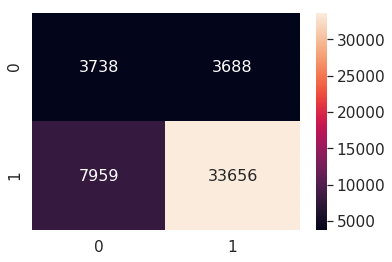

In [142]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_3, annot=True,annot_kws={"size": 16}, fmt='g')

## Test Data

In [143]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24995026120376243 for threshold 0.384
[[ 2691  2768]
 [ 7099 23494]]


In [144]:
conf_matr_df_test_4 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24995026120376243 for threshold 0.384


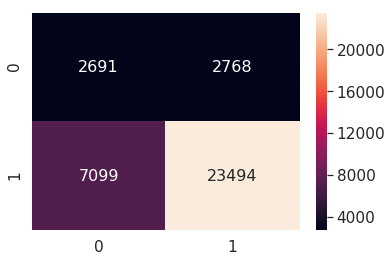

In [145]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_4, annot=True,annot_kws={"size": 16}, fmt='g')

## Visualizing Decision Tree

In [146]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

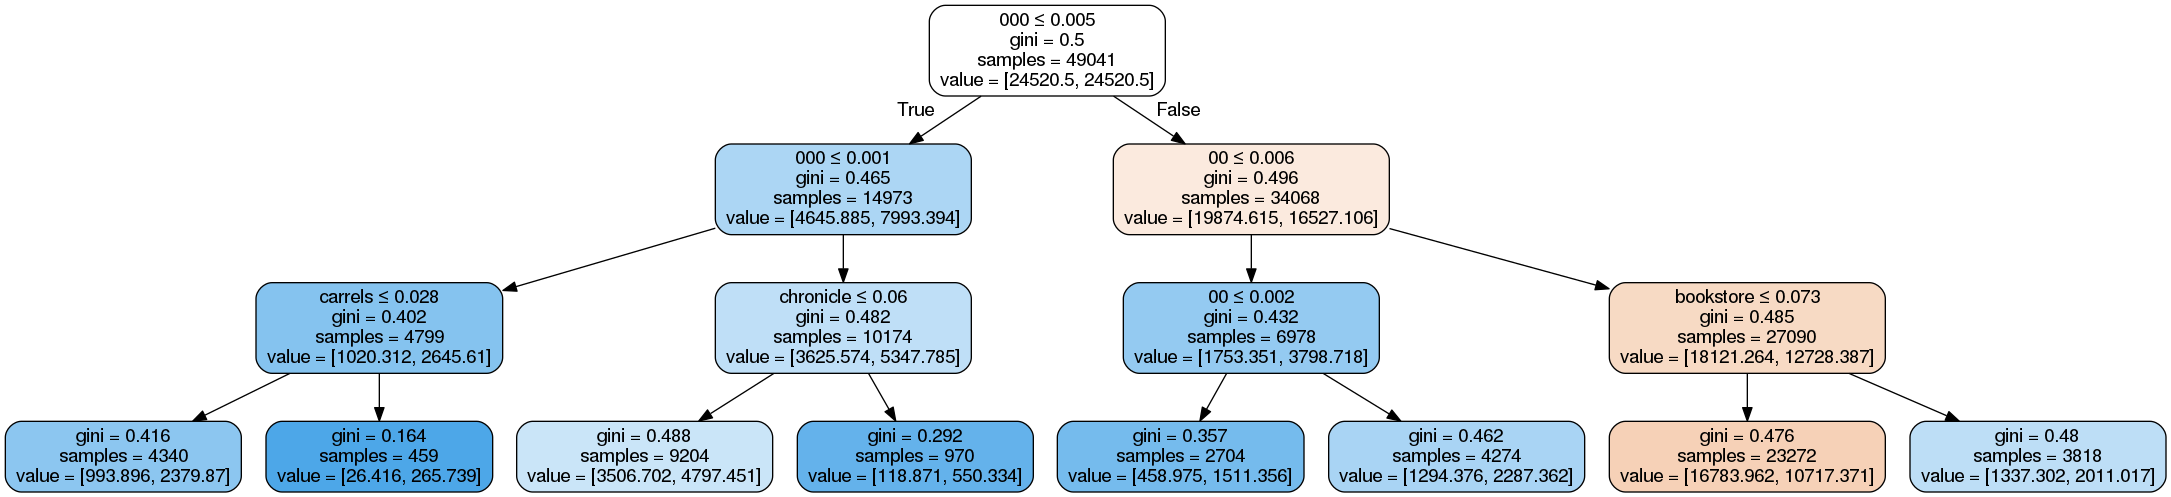

In [147]:
dot_data = StringIO()

#dt_feat_names = list(X_test.columns)
#dt_target_names = [str(s) for s in [0,1]]
export_graphviz(clfV2, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=feature_agg_tfidf)
                
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## False Positives Retrieval

In [148]:
fpi = []

for i in range(len(y_test)) :
    if (y_test.values[i] == 0) & (predictions1[i] == 1) :
        fpi.append(i)
    
fp_essay1 = []
for i in fpi :
    fp_essay1.append(X_test['clean_essays'].values[i])


In [149]:
len(fp_essay1)

2768

## Word Cloud (False positives essay)

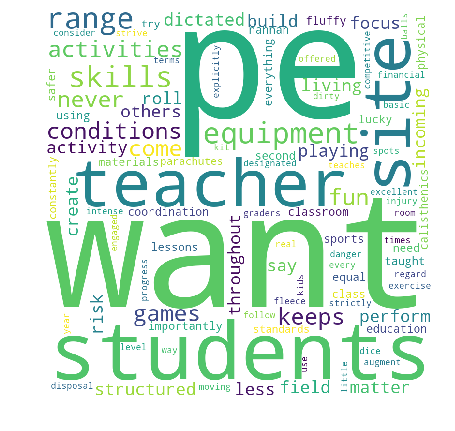

In [150]:
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 

for val in fp_essay1 :
    val = str(val)
    tokens = val.split()
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
for words in tokens :
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)
  

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()


## Building DataFrame of False Positives

In [151]:
cols = X_test.columns
X_test_falsePos1 = pd.DataFrame(columns=cols)

In [152]:
for i in fpi :
    X_test_falsePos1 = X_test_falsePos1.append(X_test.filter(items=[i], axis=0))

In [153]:
len(X_test_falsePos1)

2768

## box plot for Price

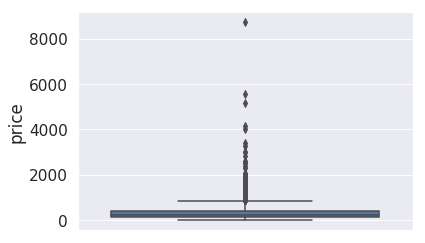

In [154]:
ax = sns.boxplot(y='price', data=X_test_falsePos1)

## PDF on teacher_number_of_previously_posted_projects

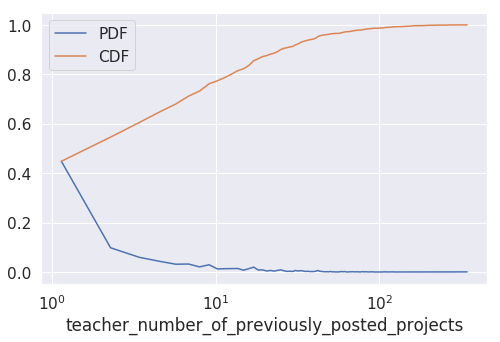

In [155]:
plt.figure(figsize=(8,5))

counts, bin_edges = np.histogram(X_test_falsePos1['teacher_number_of_previously_posted_projects'], bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"]) 
plt.xscale('log')
plt.xlabel('teacher_number_of_previously_posted_projects')    
plt.show()

## Set 3 : Categorical, Numerical features + Project_title(AVG W2V) + Preprocessed_essay (AVG W2V)

In [156]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train,school_state_categories_one_hot_train, project_grade_categories_one_hot_train,teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, avg_w2v_vectors_train, avg_w2v_vectors_titles_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test,school_state_categories_one_hot_test, project_grade_categories_one_hot_test,teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, avg_w2v_vectors_test, avg_w2v_vectors_titles_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv,school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv,teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, avg_w2v_vectors_cv, avg_w2v_vectors_titles_cv)).tocsr()

In [157]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)

Final Data matrix
(49041, 703) (49041,)
(24155, 703) (24155,)
(36052, 703) (36052,)


## Gridsearch CV

In [158]:
dt3 = DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 20, 45, 75, 100, 135, 270, 500]}

clf3 = GridSearchCV(dt3, parameters, cv= 2, scoring='roc_auc',n_jobs=-1,return_train_score=True)
clf3.fit(X_tr, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 1000],
                         'min_samples_split': [5, 10, 20, 45, 

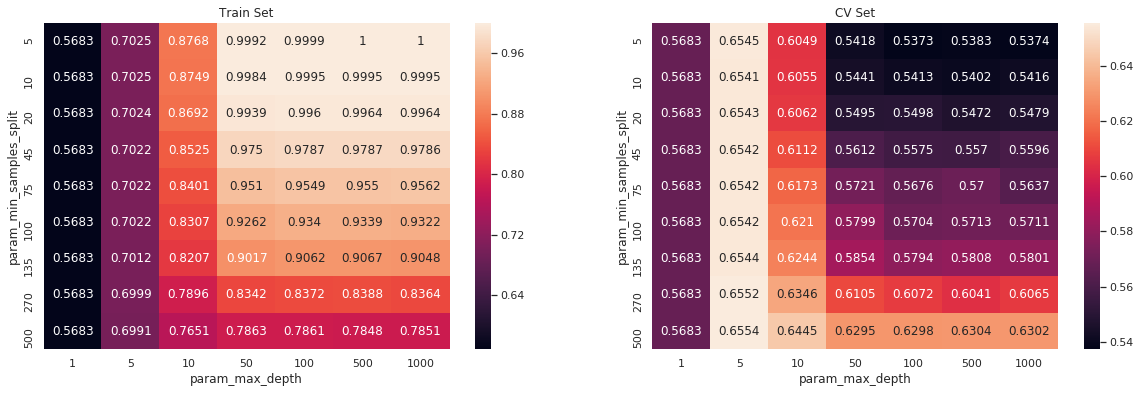

In [159]:
import seaborn as sns; sns.set()


max_scores3 = pd.DataFrame(clf3.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores3.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores3.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

## B) Train the model using the best hyper parameter value

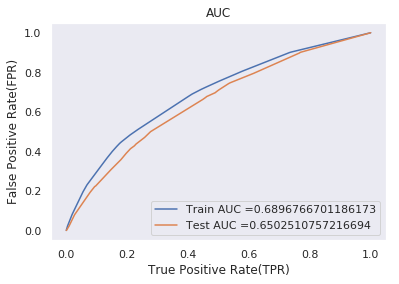

In [160]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = DecisionTreeClassifier(max_depth = 5, min_samples_split = 270,class_weight = 'balanced')
model.fit(X_tr, y_train)
clfV1=DecisionTreeClassifier (class_weight = 'balanced',max_depth=2,min_samples_split=500)
# for visulation
clfV1.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positiveclass
# not the predicted outputs
y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

## C) Confusion Matrix

## Train data

In [161]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2499999818661462 for threshold 0.411
[[ 3714  3712]
 [10258 31357]]


In [162]:
conf_matr_df_train_5 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.2499999818661462 for threshold 0.411


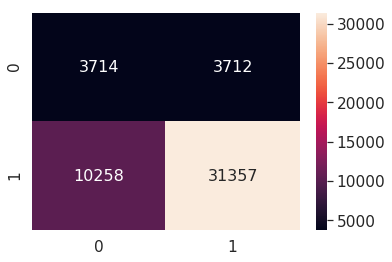

In [163]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_5, annot=True,annot_kws={"size": 16}, fmt='g')

## Test data

In [164]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.42
[[ 2729  2730]
 [ 8880 21713]]


In [165]:
conf_matr_df_test_6 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.42


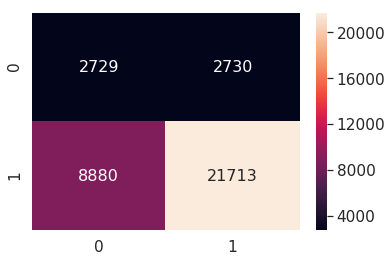

In [166]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_6, annot=True,annot_kws={"size": 16}, fmt='g')

In [167]:
fpi = []

for i in range(len(y_test)) :
    if (y_test.values[i] == 0) & (predictions1[i] == 1) :
        fpi.append(i)
    
fp_essay1 = []
for i in fpi :
    fp_essay1.append(X_test['clean_essays'].values[i])


In [168]:
len(fp_essay1)

2730

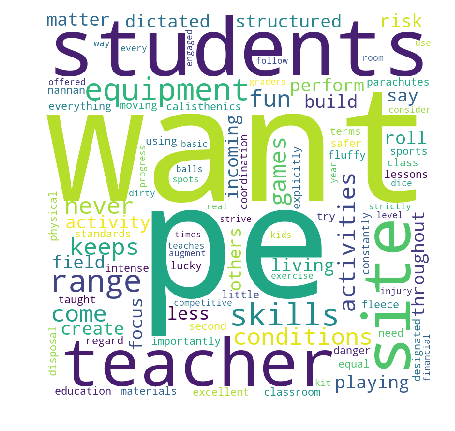

In [169]:
#Word cloud of essay
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay1 :
    val = str(val)
    tokens = val.split()
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
for words in tokens :
    comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords =
stopwords,min_font_size = 10).generate(comment_words)
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


In [170]:
#DataFrame of False Positives
# first get the columns:
cols = X_test.columns
X_test_falsePos1 = pd.DataFrame(columns=cols)
# get the data of the false pisitives
for i in fpi : # (in fpi all the false positives data points indexes)
    X_test_falsePos1 = X_test_falsePos1.append(X_test.filter(items=[i], axis=0))

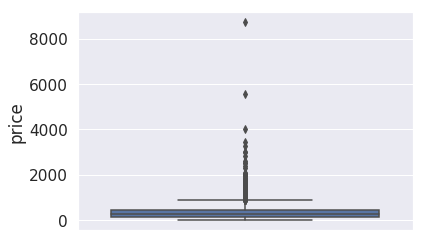

In [171]:
sns.boxplot(y='price', data=X_test_falsePos1)

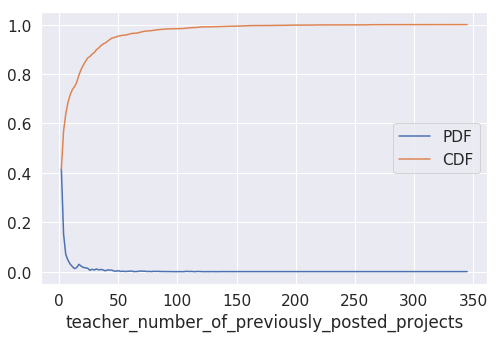

In [172]:
#PDF (FP ,teacher_number_of_previously_posted_projects)
plt.figure(figsize=(8,5))
counts, bin_edges = np.histogram(X_test_falsePos1['teacher_number_of_previously_posted_projects'],bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"])
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.show()

## Set 4 : Categorical, Numerical features + Project_title(TFIDF W2V) + Preprocessed_essay (TFIDF W2V)

In [173]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train,school_state_categories_one_hot_train, project_grade_categories_one_hot_train,teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, tfidf_w2v_vectors_train,tfidf_w2v_vectors_titles_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test,school_state_categories_one_hot_test, project_grade_categories_one_hot_test,teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, tfidf_w2v_vectors_test, tfidf_w2v_vectors_titles_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv,school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv,teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv,tfidf_w2v_vectors_cv, tfidf_w2v_vectors_titles_cv)).tocsr()

In [174]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)

Final Data matrix
(49041, 703) (49041,)
(24155, 703) (24155,)
(36052, 703) (36052,)


## GridSearchCV

In [175]:
dt4 = DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 20, 45, 75, 100, 135, 270, 500]}

clf4 = GridSearchCV(dt4, parameters, cv= 2, scoring='roc_auc',n_jobs=-1,return_train_score=True)
clf4.fit(X_tr, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 1000],
                         'min_samples_split': [5, 10, 20, 45, 

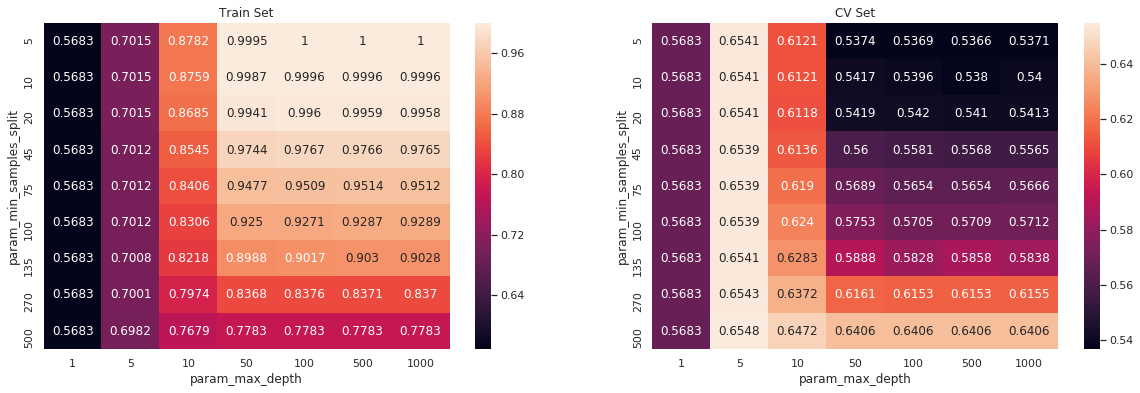

In [176]:
import seaborn as sns; sns.set()


max_scores4 = pd.DataFrame(clf4.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores4.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores4.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

## Train the model using the best hyper parameter value

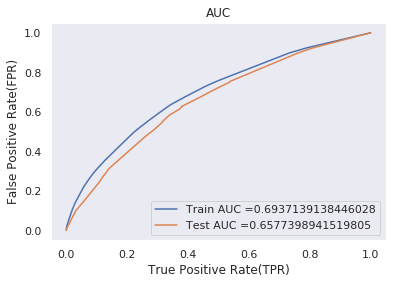

In [177]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = DecisionTreeClassifier(max_depth = 5, min_samples_split = 500,class_weight = 'balanced')
model.fit(X_tr, y_train)
clfV1=DecisionTreeClassifier (class_weight = 'balanced',max_depth=5,min_samples_split=500)
# for visulation
clfV1.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positiveclass
# not the predicted outputs
y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

## Confusion Matrix

In [178]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999412463136592 for threshold 0.403
[[ 3731  3695]
 [10129 31486]]


In [179]:
conf_matr_df_train_7 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999412463136592 for threshold 0.403


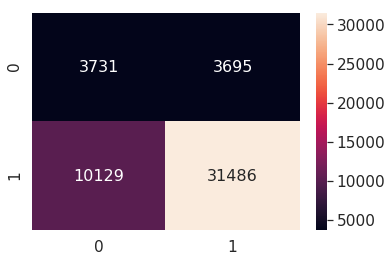

In [180]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_7, annot=True,annot_kws={"size": 16}, fmt='g')

In [181]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999858224716406 for threshold 0.444
[[ 2736  2723]
 [ 8510 22083]]


In [182]:
conf_matr_df_test_8 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999858224716406 for threshold 0.444


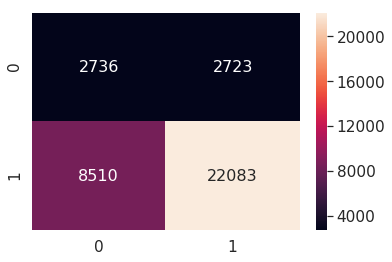

In [183]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_8, annot=True,annot_kws={"size": 16}, fmt='g')

In [184]:
#Analysis on the False positives
fpi = []
for i in range(len(y_test)) :
    if (y_test.values[i] == 0) & (predictions1[i] == 1) :
        fpi.append(i)
fp_essay1 = []
for i in fpi :
    fp_essay1.append(X_test['clean_essays'].values[i])

In [185]:
len(fp_essay1)

2723

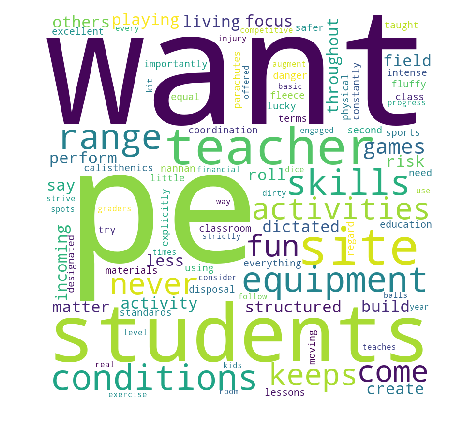

In [186]:
#WORD CLOUD OF ESSAY
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay1 :
    val = str(val)
    tokens = val.split()
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
for words in tokens :
    comment_words = comment_words + words + ' '
    
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords =stopwords,min_font_size = 10).generate(comment_words)
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

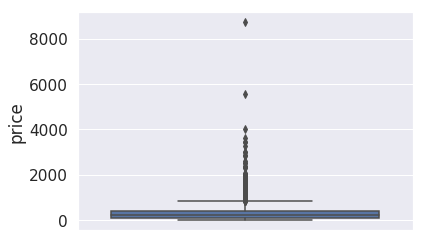

In [187]:
#Box Plot (FP 'price')
# first get the columns:
cols = X_test.columns
X_test_falsePos1 = pd.DataFrame(columns=cols)
# get the data of the false pisitives
for i in fpi : # (in fpi all the false positives data points indexes)
    X_test_falsePos1 = X_test_falsePos1.append(X_test.filter(items=[i], axis=0))
sns.boxplot(y='price', data=X_test_falsePos1)

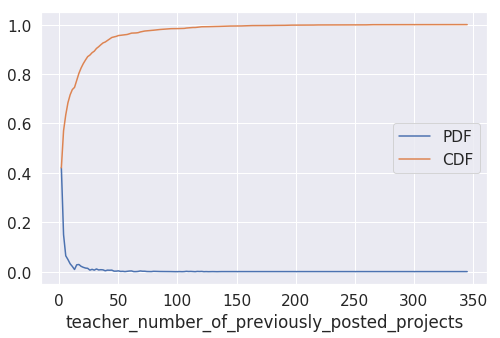

In [188]:
#PDF (FP ,teacher_number_of_previously_posted_projects)
plt.figure(figsize=(8,5))
counts, bin_edges = np.histogram(X_test_falsePos1['teacher_number_of_previously_posted_projects'],bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"])
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.show()

## Set 5 Select 5k best features from features of Set 2 using feature_importances

In [189]:
#https://stackoverflow.com/questions/47111434/randomforestregressor-and-feature-importances-error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
def selectKImportance(model, X, k=5):
    return X[:,model.best_estimator_.feature_importances_.argsort()[::-1][:k]]

In [190]:
X_train5 = selectKImportance(clf2, X_tr2,5000)
X_test5 = selectKImportance(clf2, X_te2, 5000)
print(X_train5.shape)
print(X_test5.shape)


(49041, 5000)
(36052, 5000)


In [191]:
dt5 = DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 20, 45, 75, 100, 135, 270, 500]}

clf5 = GridSearchCV(dt5, parameters, cv= 2, scoring='roc_auc',n_jobs=-1,return_train_score=True)
clf5.fit(X_tr2, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 1000],
                         'min_samples_split': [5, 10, 20, 45, 

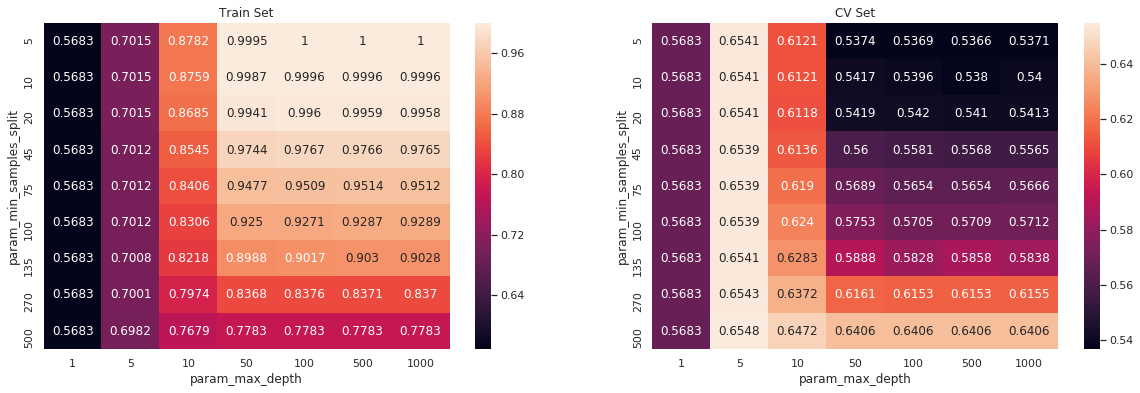

In [192]:
import seaborn as sns; sns.set()


max_scores5 = pd.DataFrame(clf4.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores5.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores5.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

## Train Model using best Hyperparameter Value 

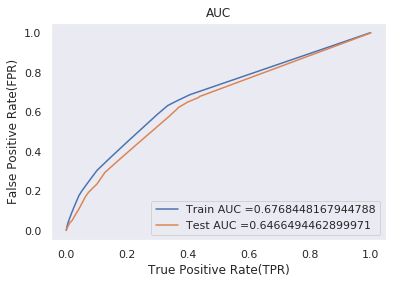

In [193]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = DecisionTreeClassifier(max_depth = 5, min_samples_split = 500,class_weight = 'balanced')
model.fit(X_tr2, y_train)
clfV1=DecisionTreeClassifier (class_weight = 'balanced',max_depth=5,min_samples_split=500)
# for visulation
clfV1.fit(X_tr2, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(model, X_tr2)    
y_test_pred = batch_predict(model, X_te2)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()


## Confusion Matrix

In [194]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24210089328089218 for threshold 0.365
[[ 4373  3053]
 [12930 28685]]


In [195]:
conf_matr_df_train_9 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24210089328089218 for threshold 0.365


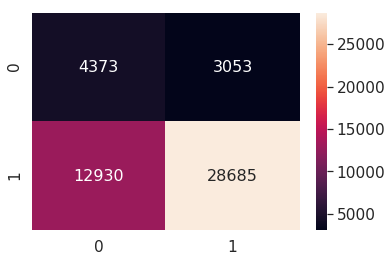

In [196]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_9, annot=True,annot_kws={"size": 16}, fmt='g')

In [197]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2460636386128223 for threshold 0.365
[[ 3072  2387]
 [ 9879 20714]]


In [198]:
conf_matr_df_test_10 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.2460636386128223 for threshold 0.365


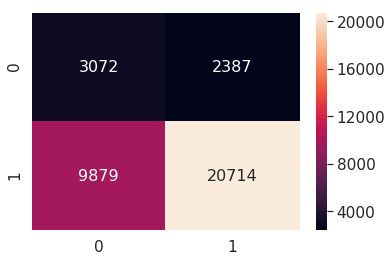

In [199]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_10, annot=True,annot_kws={"size": 16}, fmt='g')

In [200]:
#Analysis on the False positives
fpi = []
for i in range(len(y_test)) :
    if (y_test.values[i] == 0) & (predictions1[i] == 1) :
        fpi.append(i)
fp_essay1 = []
for i in fpi :
    fp_essay1.append(X_test['clean_essays'].values[i])

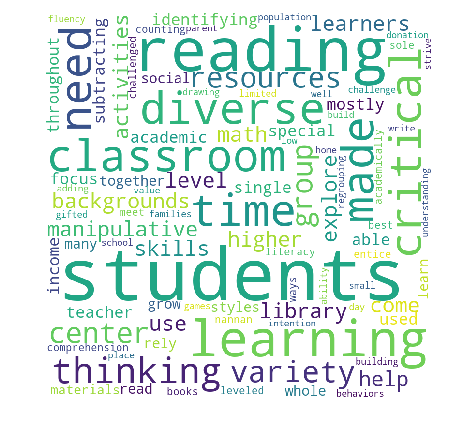

In [201]:
#WORD CLOUD OF ESSAY
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay1 :
    val = str(val)
    tokens = val.split()
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
for words in tokens :
    comment_words = comment_words + words + ' '
    
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords =stopwords,min_font_size = 10).generate(comment_words)
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

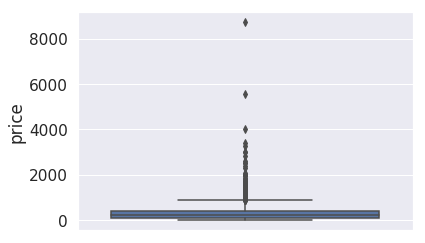

In [202]:
#Box Plot (FP 'price')
# first get the columns:
cols = X_test.columns
X_test_falsePos1 = pd.DataFrame(columns=cols)
# get the data of the false pisitives
for i in fpi : # (in fpi all the false positives data points indexes)
    X_test_falsePos1 = X_test_falsePos1.append(X_test.filter(items=[i], axis=0))
sns.boxplot(y='price', data=X_test_falsePos1)

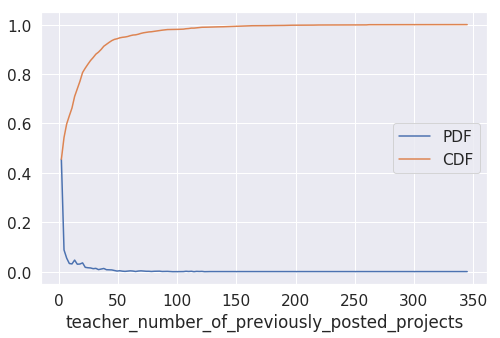

In [204]:
#PDF (FP ,teacher_number_of_previously_posted_projects)
plt.figure(figsize=(8,5))
counts, bin_edges = np.histogram(X_test_falsePos1['teacher_number_of_previously_posted_projects'],bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"])
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.show()

In [205]:
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Vectorizer", "Max depth", "min samples Split", "AUC"]

x.add_row(["BOW", 100, 500, 0.674])
x.add_row(["TFIDF", 10, 500, 0.676])
x.add_row(["AVG W2V", 10, 270, 0.650])
x.add_row(["TFIDF W2V", 5, 500, 0.657])
x.add_row(["5k best features", 5, 500, 0.646])


print(x)

+------------------+-----------+-------------------+-------+
|    Vectorizer    | Max depth | min samples Split |  AUC  |
+------------------+-----------+-------------------+-------+
|       BOW        |    100    |        500        | 0.674 |
|      TFIDF       |     10    |        500        | 0.676 |
|     AVG W2V      |     10    |        270        |  0.65 |
|    TFIDF W2V     |     5     |        500        | 0.657 |
| 5k best features |     5     |        500        | 0.646 |
+------------------+-----------+-------------------+-------+
